In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import operator  # used to sort dictionary values 

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/Random Forest/Company_Data.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [0]:
# Setting white style grid (white background) for graphs in seaborn
sns.set_style("whitegrid")

In [0]:
#Checking for null values

data.isnull().sum()   #Hence this shows that there are no null value in the dataset.

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [0]:
#Data Description

data.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [0]:
#Data info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


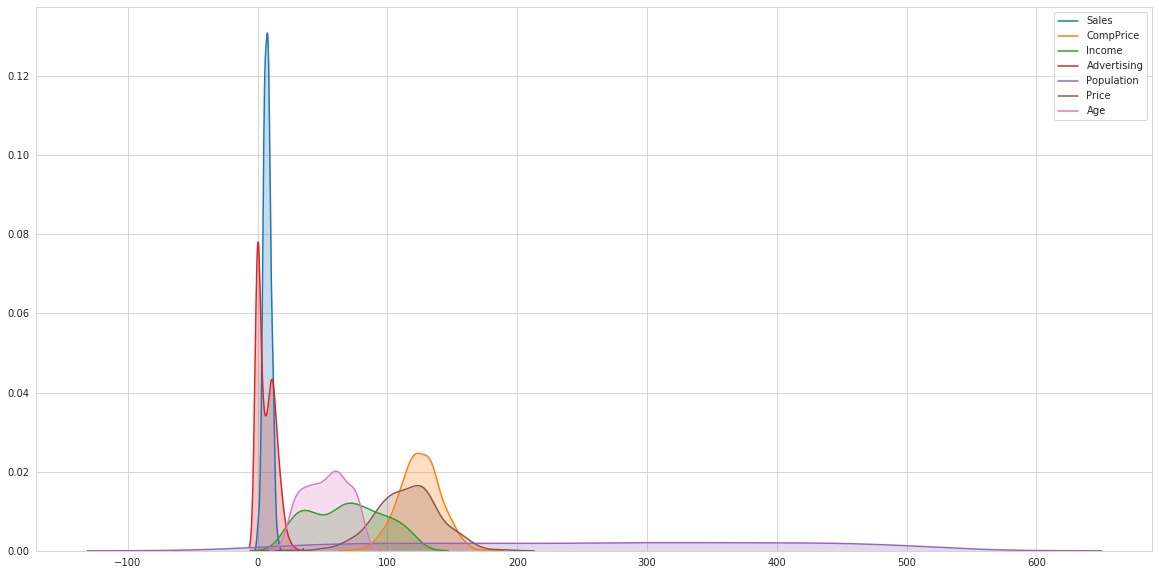

In [0]:
#Distribution of variables.

plt.figure(figsize = (20,10))
#f,axes = plt.subplots(4,2)
#j = 0
for i in ["Sales","CompPrice","Income","Advertising","Population","Price","Age"]:
  sns.kdeplot(data[i], shade = True)
  #j=j+1

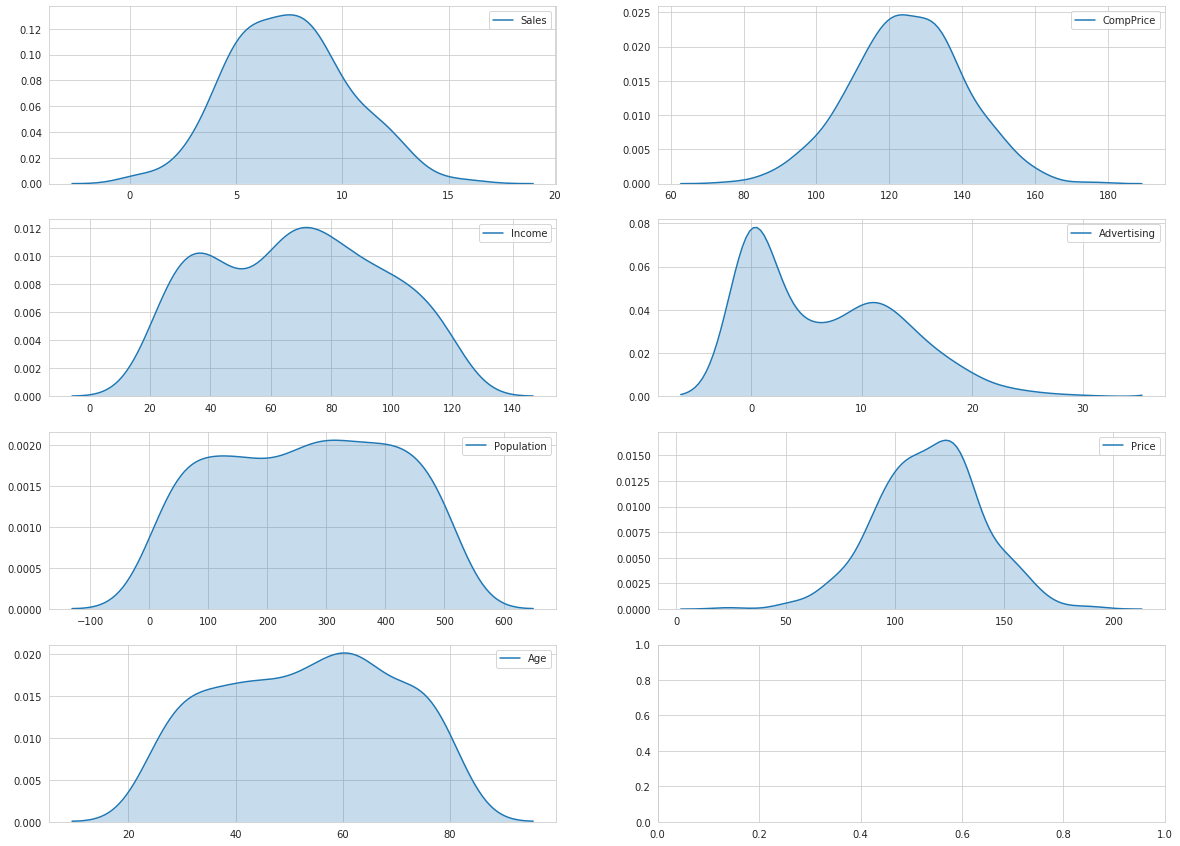

In [0]:
#Plotting the distribution of some variables 

f,axes = plt.subplots(4,2, figsize = (20,15))

col = ["Sales","CompPrice","Income","Advertising","Population","Price","Age"]
i = 0
for j in range(0,4):
  for k in range(0,2):
   sns.kdeplot(data[col[i]], ax = axes[j][k], shade = True)
   i = i+1
   if i>=len(col):
     break

In [0]:
#Data Pre-Processing

# Converting Sales data from continuous to categorical variable
#As its not mentioned in problem statement as to what values of Sale should be considered
#high. I am taking values greater than 9.5k to be high sales and rest as low sales.


data["target_sales"] = list(map((lambda x: 1 if x> 9.5 else 0), data["Sales"]))   # 1 - High Sales
                                                                                  # 0 - Low Sales

y = data["target_sales"]
data.drop(labels = ["Sales", "target_sales"], axis = 1, inplace = True)

In [0]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [0]:
#Converting all categorical variables into dummy variables

ShelveLoc_dummy = pd.get_dummies(data["ShelveLoc"], prefix = "ShelveLoc")
Education_dummy = pd.get_dummies(data["Education"], prefix = "Education")
Urban_dummy = pd.get_dummies(data["Urban"], prefix = "Urban")
US_dummy = pd.get_dummies(data["US"], prefix = "US")

In [0]:
data.drop(labels = ["ShelveLoc", "Education", "Urban", "US"], axis = 1, inplace = True)

In [0]:
data_final = pd.concat([data, ShelveLoc_dummy, Education_dummy, Urban_dummy, US_dummy], axis = 1)

In [0]:
#Final Data Frame
data_final.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Education_10,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,111,48,16,260,83,65,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,113,35,10,269,80,59,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
3,117,100,4,466,97,55,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
4,141,64,3,340,128,38,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [0]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size = 0.2, stratify = y, random_state = 42)

In [0]:
#Building Random Forest model on the above dataset and predicting.

rf = RandomForestClassifier(n_estimators = 323)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [0]:
#Constructing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
cm

array([[60,  3],
       [ 5, 12]])

In [0]:
cm_ravel = cm.ravel() #tn, fp, fn, tp

In [0]:
cm_ravel

array([60,  3,  5, 12])

In [0]:
#Accuracy
#(tp+tn)/(tp+tn+fp+fn)

a = (cm_ravel[3] + cm_ravel[0])/(len(y_test))
print("Accuracy is: ",round(a*100,2))

#Precision
#tp/(tp+fp)

p = cm_ravel[3]/(cm_ravel[3] + cm_ravel[1])
print("\nPrecision is: ", round(p*100,2))

#Recall
#tp/(tp+fn)

r = cm_ravel[3]/ (cm_ravel[3] + cm_ravel[2])
print("\nRecall is: ", round(r*100,2))

#F1 score
#(2*Recall*Precision)/(Recall+ Precision)

f1 = (2*r*p)/(r+p)
print("\nF1 Score is: ",round(f1*100,2))

Accuracy is:  90.0

Precision is:  80.0

Recall is:  70.59

F1 Score is:  75.0


In [0]:
#Attributes causing high sale.

rf.feature_importances_
  

array([0.09988949, 0.08603391, 0.08693255, 0.09131463, 0.20088174,
       0.1080044 , 0.03609395, 0.10715082, 0.02624048, 0.01627703,
       0.00739899, 0.0098118 , 0.00785534, 0.00883345, 0.01074022,
       0.01078923, 0.01061106, 0.01059342, 0.0150214 , 0.01408082,
       0.01893862, 0.01650663])

In [0]:
#combining feature_importance score and the column's index number in a dictionary.
# and sorting based on feature importance in descending order. 

features = dict()
j = 0
for i in list(rf.feature_importances_):
  features[i] = j
  j = j+1

sorted_features = sorted(features.items(), key=operator.itemgetter(0), reverse = True)  #Sorting features

feature_index = [sorted_features[i][1]  for i in range(len(sorted_features))]   #extracting sorted feature's index

In [0]:
# 5 top Important features
important_features = [data_final.columns[i] for i in feature_index[0:5]]

important_features

['Price', 'Age', 'ShelveLoc_Good', 'CompPrice', 'Population']